In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [2]:
data = pd.read_csv('Reddit_Data.csv')

In [3]:
data.shape

(37249, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [6]:
lm = WordNetLemmatizer()

In [7]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [8]:
corpus = text_transformation(data['clean_comment'])

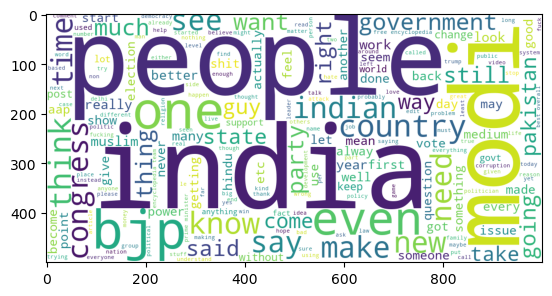

In [9]:
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [10]:
cv = CountVectorizer(max_features=5000)
traindata = cv.fit_transform(corpus)

In [11]:
X = traindata
y = data.category

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, data['category'], test_size=0.2, random_state=42,stratify=y)

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
#classifier = MultinomialNB()

In [33]:
classifier = RandomForestClassifier()

In [34]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [38]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.50      0.62      1655
           0       0.82      0.94      0.88      2629
           1       0.80      0.87      0.83      3166

    accuracy                           0.81      7450
   macro avg       0.81      0.77      0.78      7450
weighted avg       0.81      0.81      0.80      7450



In [39]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[ 821  246  588]
 [  46 2474  109]
 [ 130  295 2741]]
